##  Importing data and packages

In [94]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
ipytest.autoconfig()

import warnings
warnings.filterwarnings('ignore')

In [96]:
engine = create_engine('sqlite:///data.db', echo=False)
con = engine.connect()
df_patient = pd.read_sql('select * from patient', con=con)
df_pcr = pd.read_sql('select * from test', con=con)
con.close()

## Data exploratory and cleaning
 
**1. Patient Data**

**2. Pcr Data**

**3. Joining Patient data with Pcr data**

**4. Detecting and removing duplicates**

### 1.  Patient Data

In [97]:
df_patient.head()

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
0,221958,matisse,clarke,13.0,rene street,ellenbrook,2527,wa,19710708.0,32.0,08 86018809,westella
1,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown
2,231932,alice,conboy,35.0,mountain circuit,prospect,2305,nsw,19810905.0,22.0,02 20403934,None
3,465838,sienna,craswell,39.0,cumberlegeicrescent,henty,3620,wa,19840809.0,30.0,02 62832318,jodane
4,359178,joshua,bastiaans,144.0,lowrie street,campbell town,4051,nsw,19340430.0,31.0,03 69359594,None


In [98]:
# Patient dataset dimensions - (rows, columns)
df_patient.shape

(20000, 12)

In [5]:
# Patient Features data-type
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   patient_id     20000 non-null  int64  
 1   given_name     19560 non-null  object 
 2   surname        19575 non-null  object 
 3   street_number  19618 non-null  float64
 4   address_1      19204 non-null  object 
 5   suburb         19788 non-null  object 
 6   postcode       19801 non-null  object 
 7   state          18010 non-null  object 
 8   date_of_birth  17989 non-null  float64
 9   age            16003 non-null  float64
 10  phone_number   19081 non-null  object 
 11  address_2      7893 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.8+ MB


In [99]:
# Count of null values for patient dataset
df_patient.isnull().sum()

patient_id           0
given_name         440
surname            425
street_number      382
address_1          796
suburb             212
postcode           199
state             1990
date_of_birth     2011
age               3997
phone_number       919
address_2        12107
dtype: int64

In [100]:
# Remove null values for patient dataset
df_patient=df_patient.dropna()

In [101]:
# Count of null values for patient dataset after removing null values
df_patient.isnull().sum()

patient_id       0
given_name       0
surname          0
street_number    0
address_1        0
suburb           0
postcode         0
state            0
date_of_birth    0
age              0
phone_number     0
address_2        0
dtype: int64

In [102]:
# Convert the 'postcode' from object to an integer 
df_patient['postcode']=df_patient['postcode'].astype('int')


In [103]:
# Convert the 'age' from float to an integer 
df_patient['age']=df_patient['age'].astype('int')

In [104]:
# Convert the 'street_number' from float to an integer 
df_patient['street_number']=df_patient['street_number'].astype('int')

In [105]:
df_patient['date_of_birth'] = pd.to_datetime(df_patient['date_of_birth'],format='%Y%m%d', errors='ignore')

In [106]:
# Statistical summary for patient
df_patient.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,4267.0,5.550803e+05,257565.248768,100126.0,334593.5,560828.0,776466.0,999607.0
street_number,4267.0,8.427068e+01,657.290756,0.0,10.0,25.0,59.0,39430.0
postcode,4267.0,3.664084e+03,1414.489014,800.0,2480.0,3186.0,4567.0,7470.0
date_of_birth,4267.0,1.950159e+07,285134.460327,19000119.0,19260301.0,19510305.0,19750412.5,19991213.0
age,4267.0,2.755214e+01,7.752820,1.0,24.0,29.0,32.0,92.0


In [107]:
df_patient.describe(include=['O'])

,given_name,surname,address_1,suburb,state,phone_number,address_2
count,4267,4267,4267,4267,4267,4267,4267
unique,802,1639,2235,1550,33,4063,2438
top,emiily,white,paul coe crescent,toowoomba,nsw,03 36305891,brentwood vlge
freq,84,108,14,37,1516,4,55


In [108]:
# Count 'patient_id' unique values
df_patient["patient_id"].nunique()

4257

In [109]:
# List 'patient_id' unique values's count
df_patient["patient_id"].value_counts()

721781    2
535564    2
289139    2
751176    2
328071    2
         ..
748843    1
754986    1
842627    1
214310    1
229909    1
Name: patient_id, Length: 4257, dtype: int64

In [110]:
# Count 'state' unique values
df_patient["state"].nunique()

33

In [111]:
# List 'state' unique values's count
df_patient["state"].value_counts()

nsw     1516
vic     1027
qld      821
wa       378
sa       297
tas      116
act       48
nt        38
nsc        2
nsn        1
nssw       1
ns         1
ndw        1
vie        1
nsjh       1
nfw        1
nsa        1
ai         1
qlr        1
qle        1
nsew       1
qls        1
vif        1
nfsw       1
ta         1
nsxw       1
vcci       1
vq         1
nsgs       1
qod        1
tab        1
nsd        1
nss        1
Name: state, dtype: int64

In [112]:
# Count 'phone_number' unique values
df_patient["phone_number"].nunique()

4063

In [113]:
# List 'phone_number' unique values's count
df_patient["phone_number"].value_counts()

03 36305891    4
04 86949335    4
07 60099656    4
03 74582010    4
04 24267634    4
              ..
08 77710298    1
03 39023404    1
04 25986133    1
07 11995446    1
03 34884476    1
Name: phone_number, Length: 4063, dtype: int64

### 2. Pcr Data

In [114]:
# Pcr dataset dimensions - (rows, columns)
df_pcr.head()

,patient_id,pcr
0,653091,N
1,347667,Negative
2,708481,Positive
3,148825,Negative
4,150081,Negative


In [115]:
# Pcr Dataset dimensions - (rows, columns)
df_pcr.shape

(8800, 2)

In [116]:
# Pcr Features data-type
df_pcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  8800 non-null   int64 
 1   pcr         8800 non-null   object
dtypes: int64(1), object(1)
memory usage: 137.6+ KB


In [117]:
# Count of null values for pcr dataset
df_pcr.isnull().sum()

patient_id    0
pcr           0
dtype: int64

In [118]:
# Statistical summary for pcr 
df_pcr.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,8800.0,554175.918977,259491.9595,100037.0,331553.0,556969.0,778063.75,999993.0


In [119]:
df_pcr.describe(include=['O'])

,pcr
count,8800
unique,4
top,N
freq,3482


In [120]:
# Count unique values for pcr
df_pcr['pcr'].nunique()

4

In [121]:
# List unique values's count for pcr
df_pcr['pcr'].value_counts()

N           3482
Negative    3134
Positive    1283
P            901
Name: pcr, dtype: int64

In [122]:
# Replace 'N' and 'P' values with 'Negative' and 'Positive'
df_pcr['pcr'] = df_pcr['pcr'].replace(['N'],'Negative')
df_pcr['pcr'] = df_pcr['pcr'].replace(['P'],'Positive')
df_pcr.describe(include=['O'])

,pcr
count,8800
unique,2
top,Negative
freq,6616


### 3.  Joining the Patient data with Pcr data

In [123]:
# Joining the tables on 'patient id'
df=df_patient.join(df_pcr.set_index('patient_id'),on='patient_id')

In [124]:
df.head()

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2,pcr
0,221958,matisse,clarke,13,rene street,ellenbrook,2527,wa,19710708,32,08 86018809,westella,NaN
1,771155,joshua,elrick,23,andrea place,east preston,2074,nsw,19120921,34,02 97793152,foxdown,Negative
3,465838,sienna,craswell,39,cumberlegeicrescent,henty,3620,wa,19840809,30,02 62832318,jodane,NaN
7,832180,jack,renfrey,27,osmand street,maribyrnong,2170,qld,19610518,31,03 15575583,dhurringill,Positive
20,421879,callum,nicolle,2,mcleod place,walgett,2144,nsw,19340319,25,03 79802023,marella,NaN


In [125]:
# Dataset dimensions - (rows, columns)
df.shape

(4288, 13)

In [126]:
# Count of null values 
df.isnull().sum()

patient_id          0
given_name          0
surname             0
street_number       0
address_1           0
suburb              0
postcode            0
state               0
date_of_birth       0
age                 0
phone_number        0
address_2           0
pcr              2392
dtype: int64

In [127]:
# Remove null values 
df=df.dropna()

In [128]:
# Count of null values 
df.isnull().sum()

patient_id       0
given_name       0
surname          0
street_number    0
address_1        0
suburb           0
postcode         0
state            0
date_of_birth    0
age              0
phone_number     0
address_2        0
pcr              0
dtype: int64

In [129]:
# Dataset dimensions - (rows, columns)
df.shape

(1896, 13)

In [130]:
# Count 'patient_id' unique values
df["patient_id"].nunique()

1869

On Observe que le nombre des 'patient id' uniques qui existe est different de nombre des lignes du dataframe, ce qui signifie l'existence de certains 'patient_id' dupliquees  

In [131]:
# Count 'phone_number' unique values
df["phone_number"].nunique()

1829

On Observe que le nombre des 'phone_number' uniques qui existe est different de nombre des lignes du dataframe, ce qui signifie l'existence de certains 'phone_number' dupliquees

In [132]:
df.head()

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2,pcr
1,771155,joshua,elrick,23,andrea place,east preston,2074,nsw,19120921,34,02 97793152,foxdown,Negative
7,832180,jack,renfrey,27,osmand street,maribyrnong,2170,qld,19610518,31,03 15575583,dhurringill,Positive
65,517113,trey,glass,27,mugga way,carnegie,5093,nsw,19180715,21,08 08091408,blackridge flyfishing school,Negative
74,996942,zachary,piazza,772,beaney street,manunda,2223,sa,19750703,25,02 36108470,rsd frareen,Negative
92,323165,taylor,binns,2,dunbar street,mount annan,4455,wa,19000509,11,08 99185004,sec 528,Negative


In [133]:
# Listing duplicated "patient_id"
test_id=df.pivot_table(index = ['patient_id'], aggfunc ='size').reset_index()
test_id.columns=['patient_id','count']
test_id[test_id['count']>1].head()

,patient_id,count
138,169519,2
229,227309,2
240,231458,2
346,289139,2
435,328071,4


In [134]:
df[df['patient_id']==328071]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2,pcr
1658,328071,olivia,stephenson,28,finey close,sale,5307,vic,19310708,23,07 71969783,gunnedoo,Positive
1658,328071,olivia,stephenson,28,finey close,sale,5307,vic,19310708,23,07 71969783,gunnedoo,Positive
2475,328071,matthew,wardle,39,proserpine court,north bondi,4567,vic,19830929,31,04 49762183,rosetta village,Positive
2475,328071,matthew,wardle,39,proserpine court,north bondi,4567,vic,19830929,31,04 49762183,rosetta village,Positive


On observe que 'patient_id' n'identifie pas de manière unique chaque ligne de la table, donc il ne signifie pas une contrainte d'unicité

In [135]:
# Listing duplicated "phone_number"
test_phone=df.pivot_table(index = ['phone_number'], aggfunc ='size').reset_index()
test_phone.columns=['patient_id','count']
test_phone[test_phone['count']>1].head()

,patient_id,count
11,02 03546747,2
23,02 07634312,2
33,02 11484426,2
94,02 30368694,2
118,02 37249432,2


In [136]:
test_phone[test_phone['count']>3].head()

,patient_id,count
179,02 54377445,4


In [137]:
df[df['phone_number']=='02 54377445']

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2,pcr
1485,924690,giuliana,robsgn,12,federal zighway,dandenong north,2165,qld,19801228,32,02 54377445,marungi park,Negative
12274,158601,giulina,robson,13,federal iqhway,dandenong north,2165,qld,19801228,32,02 54377445,marungi park,Negative
13306,301587,giuliana,robson,13,federal highway,dandenong north,2165,qld,19801228,32,02 54377445,marungi park,Negative
13406,233964,giuliaaa,robson,13,federal highway,dandenong north,2165,qld,19820228,32,02 54377445,marungi park,Positive


On observe que les quatres lignes du resultat sont presque identiques , ce qui signifie que l'attribut 'phone_number' identifie de manière unique chaque ligne de la table, donc il signifie une contrainte d'unicité

### 4.  Detecting and removing duplicates

In [138]:
# Importing detect duplicates function from inria_assignment
from inria_assignment.detect_duplicates import detect_duplicates

In [139]:
# Detect duplicates and remove it 
result=detect_duplicates(df)

In [140]:
result.head()

,patient_id,name,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2,pcr
0,314601,liam paterson,1,chippindall circuit,chelsea heights,5238,nsw,19420529,28,02 00232845,eagle crest,Positive
1,623526,lauren schoettke,7,lyall crescent,south brisbane,2518,wa,19360110,23,02 00265282,bayana,Negative
2,830892,lindholm yasmin,197,marshall street,cecil hills,4010,nsw,19350405,28,02 00277734,brentwood village,Negative
3,549813,alec dichiera,23,mills street,daw park,4865,nsw,19590818,32,02 00476816,villa 2,Negative
4,548402,white william,19,sproule circuit,torquay,4034,qld,19670817,27,02 01392154,three springs stud,Negative


In [141]:
result.shape

(1829, 12)

In [142]:
result[result['phone_number']=='02 54377445']

,patient_id,name,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2,pcr
179,158601,robson giuliana,13,federal highway,dandenong north,2165,qld,19801228,32,02 54377445,marungi park,Negative


In [143]:
from IPython.core.display import display, HTML
def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [144]:
# Comparing data before and after removing duplicates / case of phone_number = 02 54377445
display_side_by_side([df[df['phone_number']=='02 54377445'], result[result['phone_number']=='02 54377445']], ['before applying detect_duplicates function', 'after applying detect_duplicates function'])

On observe que pour chaque groupe de même "phone_number" la fonction supprime les doublons et retourne une seule ligne avec les plus fréquentes valeurs pour chaque attribut.

##  Visualisation

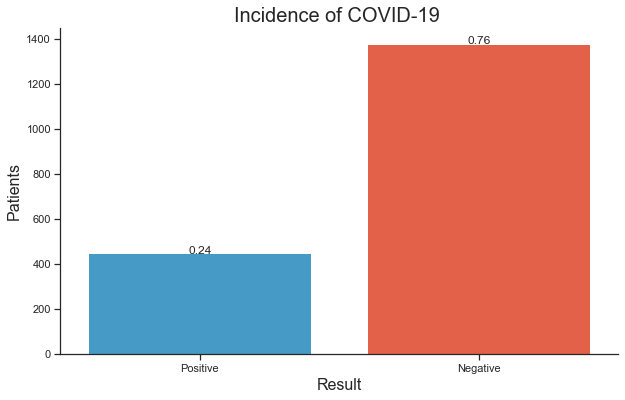

In [145]:
#Plotting the percentage of postive and negative cases
plt.figure(figsize = (10,6))

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

five_thirty_eight = [
    '#30a2da',
    '#fc4f30',
    '#e5ae38',
    '#6d904f',
    '#8b8b8b',
]

sns.set_palette(sns.color_palette(five_thirty_eight))

total = float(len(result))
#results = ['Negative', 'Positive']  
ax = sns.countplot(x='pcr', data=result)
#ax.set_xticklabels(results)

# add percentages above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            p.get_height(),
            '{:1.2f}'.format(height/total),
            ha='center')
    
plt.title('Incidence of COVID-19 ', fontsize=20)
plt.xlabel('Result')
plt.ylabel('Patients')
sns.set(style='ticks')
sns.despine()

On observe que les cas positives constituent 24% des patients,quand les cas negatives constituent 76% des patients

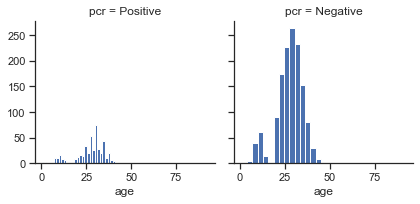

In [146]:
# Plotting the distribution of cases by age
g = sns.FacetGrid(result, col='pcr')
g.map(plt.hist, 'age', bins=30)

On observe que l'intervale d'age pour les deux cas varie entre 8 ans et 45 ans, ainsi que les gens les plus testés sont les jeunes de trentaine.

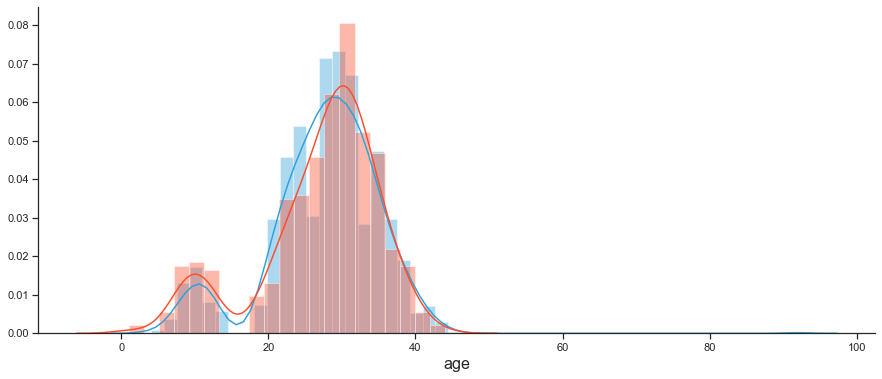

In [93]:
# Comparing the negative and positive distributions by age
result_positive = result.loc[result['pcr'] == 'Negative']
result_negative = result.loc[result['pcr'] == 'Positive']

five_thirty_eight = [
    '#30a2da',
    '#fc4f30',
    '#e5ae38',
    '#6d904f',
    '#8b8b8b',
]

plt.figure(figsize = (15,6))
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

sns.set_palette(sns.color_palette(five_thirty_eight))

sns.distplot(result_positive['age'])
sns.distplot(result_negative['age'])

sns.set(style='ticks')
sns.despine()

Text(0.5, 1.0, 'Negative case by state')

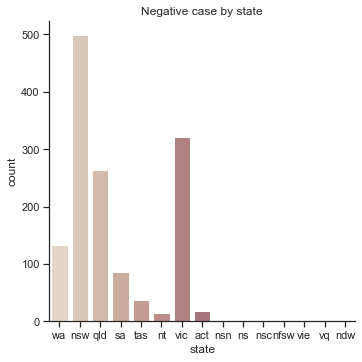

In [91]:
# Plotting the distribution of negative cases by state
sns.catplot(x="state", kind="count", palette="ch:.25", data=result[result['pcr']=='Negative'])
plt.title('Negative case by state')

Text(0.5, 1.0, 'Positive case by state')

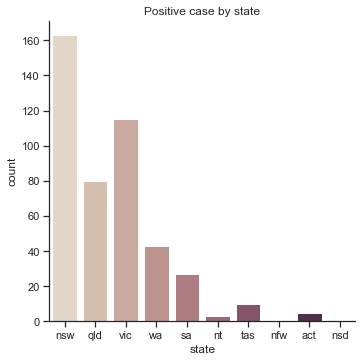

In [90]:
# Plotting the distribution of positive cases by state
sns.catplot(x="state", kind="count", palette="ch:.25", data=result[result['pcr']=='Positive']);
plt.title('Positive case by state')

Text(0.5, 1.0, 'Positive case by state')

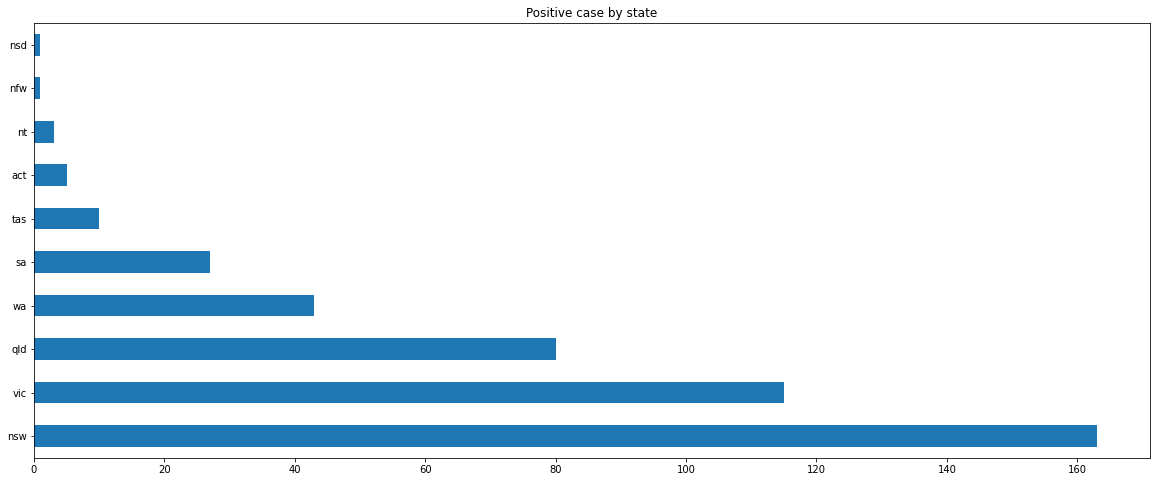

In [80]:
# Plotting the distribution of positive cases by state and ordered
result[result['pcr']=='Positive']['state'].value_counts().plot(kind='barh',figsize=(20,8)).set_title("Positive case by state")

On observe que les cas positives sont plus elevés dans les states nsw, vic et qld, quand les autres states connaissent un nombre abaissé

Text(0.5, 1.0, 'Negative case by state')

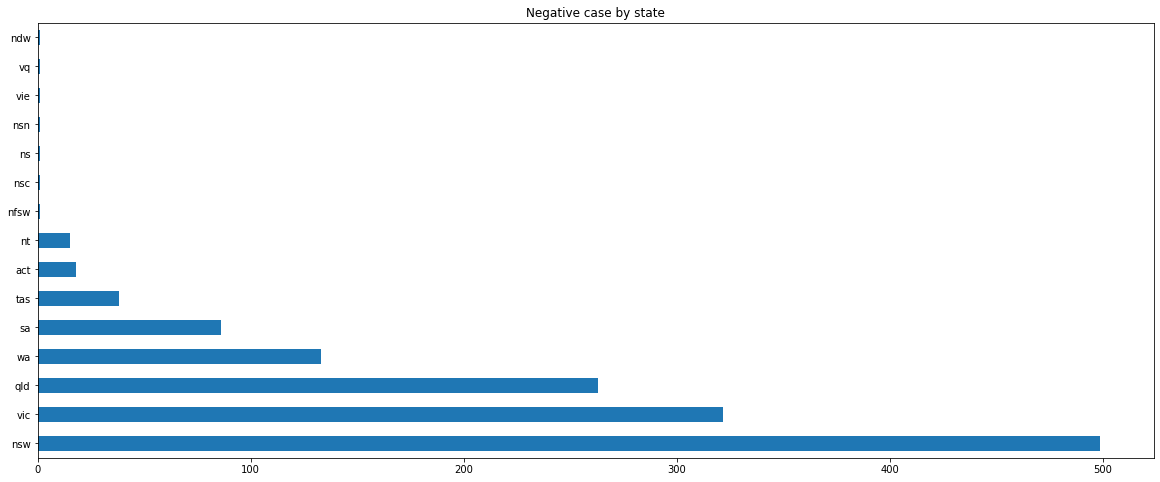

In [79]:
# Plotting the distribution of negative cases by state and ordered
result[result['pcr']=='Negative']['state'].value_counts().plot(kind='barh').set_title("Negative case by state")

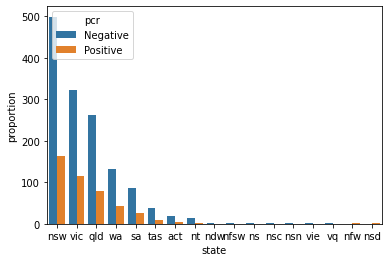

In [81]:
# Comparing negative case with positive case
x, y, hue = "state", "proportion", "pcr"
hue_order = ["negative", "positive"]

(result[x]
 .groupby(result[hue])
 .value_counts()
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

